# The SIR Disease Model
## Introduction

The SIR model is a simple and widely-used mathematical model in epidemiology that describes the spread of a contagious disease within a population. The model categorizes the population into three compartments:

![image.png](explanation.png)

- **Susceptible (S):** Individuals who are not yet infected but are at risk of becoming infected.
- **Infected (I):** Individuals who are currently infected and can transmit the disease to susceptible individuals.
- **Recovered (R):** Individuals who have recovered from the disease and are assumed to have gained immunity, meaning they cannot be infected again.

The SIR model is governed by a set of ordinary differential equations (ODEs) that describe the flow of individuals between these compartments over time.

$$
\frac{dS}{dt} = -\beta \frac{S I}{N} \quad \quad 
\frac{dI}{dt} = \beta \frac{S I}{N} - \gamma I \quad \quad 
\frac{dR}{dt} = \gamma I
$$

Where:
- $S(t)$, $I(t)$, and $R(t)$ represent the number of susceptible, infected, and recovered individuals at time $t$, respectively.
- $N$ is the total population, assumed to remain constant ($N = S + I + R$).
- $\beta$ is the transmission rate, which represents the rate at which susceptible individuals contract the disease.
- $\gamma$ is the recovery rate, which is the rate at which infected individuals recover and move into the recovered compartment.

## Methodology

### 1. Define the ODE System

We start by defining a function that takes in the current state of the system $A = (S, I, R)$ and returns the rates of change for each compartment $\frac{dA}{dt} = (\frac{dS}{dt}, \frac{dI}{dt}, \frac{dR}{dt})$:

In [1]:
# Our Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def dAdt(A, t, beta, gamma, N):
    S = A[0]
    I = A[1]
    R = A[2]
    return [
        -beta/N * S * I,
        beta/N * S * I - gamma * I,
        gamma*I
    ]

### 2. Set Initial Conditions and Parameters

We then specify the initial conditions and parameters for the model:

- **Initial Conditions:**
    - $(S(0), I(0), R(0)) = (N-I(0), 574, 0)$: Initial number of susceptible, infected and recovered individuals as a triplet.

- **Parameters:**
    - $\beta = 0.39 days^{-1}$: Transmission rate.
    - $\gamma = \frac{1}{10} days^{-1}$: Recovery rate.
    - $N = 1.1 * 10^7$: Total population.

**These are the parameters that describe approximately the situation of the Corona virus infection in China, focussing on the city of Wuhan, on January 22 2020.**

In [10]:
# Define the time points at which the solution is computed
times = np.arange(0, 100, 1)
# This creates an array of time points from 0 to 99, with a step size of 1.

# Define the recovery rate (gamma), 1/10 per unit time.
gamma = 1/100

# Define the total population (N), 11 million
N = 1.1e5

# Define the transmission rate (beta)
beta = 0.39

# Set the initial conditions
S0, I0, R0 = N-574, 574, 0
# Initial number of susceptible individuals (S0) is the total population minus the initially infected (574).
# Initial number of infected individuals (I0) is 574.
# Initial number of recovered individuals (R0) is 0.

### 3. Solve the ODE
We use the `odeint` function from SciPy to integrate the ODEs:

In [11]:
# Solve the system of differential equations
sol = odeint(dAdt, y0=[S0, I0, R0], t=times, args=(beta, gamma, N))

### 4. Analyze and Visualize Results
Extract and Plot the Number of Susceptible, Infected, and Recovered Individuals:


In [12]:
# Extract the solution for each compartment

# Susceptible individuals
S = sol.T[0]

# Infected individuals
I = sol.T[1]

# Recovered individuals
R = sol.T[2]

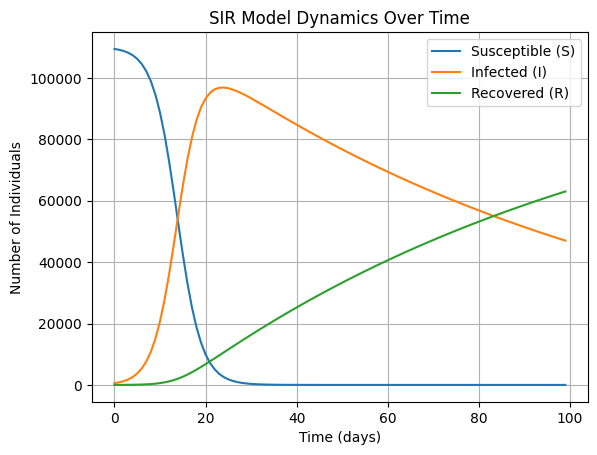

In [13]:
plt.plot(times, S, label="Susceptible (S)")  # Plot the number of susceptible individuals over time
plt.plot(times, I, label="Infected (I)")     # Plot the number of infected individuals over time
plt.plot(times, R, label="Recovered (R)")    # Plot the number of recovered individuals over time
plt.grid()                                   # Add a grid to the plot for better readability
plt.legend()                                 # Add a legend to label each line
plt.title("SIR Model Dynamics Over Time")    # Add a title to the plot
plt.xlabel("Time (days)")                    # Label the x-axis
plt.ylabel("Number of Individuals")          # Label the y-axis
plt.show()                                   # Display the plot

### 5. (Extra) Model Hospitalizations as a Function of Time

In this section, we will calculate and plot the number of people in the hospital as a function of time based on the following assumptions:

- **Hospitalization Rate:** 5% of the rate at which people recover ($dR/dt$).
- **Average Hospital Stay:** 3 days.

#### 5.1. Determine the Hospitalization Rate:
- The rate at which new individuals are hospitalized can be calculated as:
$$
h_a = 0.05 * \gamma * I
$$
- Here, $h_a$ represents the number of new hospitalizations per day, $\gamma$ is the recovery rate, and $I$ is the number of infected individuals.

In [14]:
ha = 0.05 * gamma * I  # Calculate the daily rate of new hospitalizations

#### 5.2 Model the Number of People in the Hospital

- To model the total number of people in the hospital at any given time, we sum the number of new hospitalizations over the past 3 days. This is done by shifting the array of daily hospitalizations by one and two days, and then summing these values.

In [15]:
h = ha + np.insert(ha, 0, np.zeros(1))[:-1] + np.insert(ha, 0, np.zeros(2))[:-2]  # Sum hospitalizations over the past 3 days

#### 5.3. Plot the Number of People in the Hospital Over Time

Finally, plot the number of people in the hospital as a function of time.

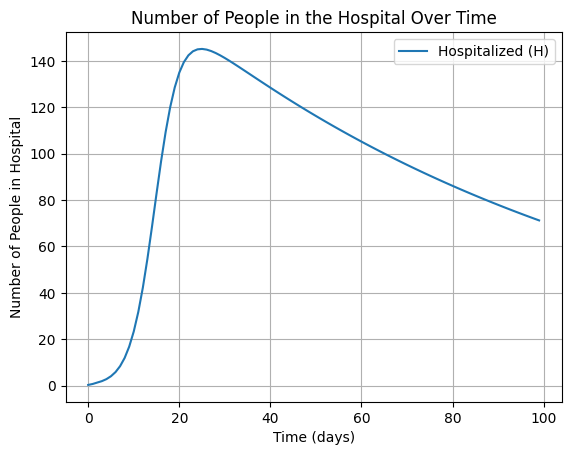

In [16]:
plt.plot(times, h, label="Hospitalized (H)")  # Plot the number of people in the hospital over time
plt.grid()                                    # Add a grid to the plot for better visualization
plt.legend()                                  # Add a legend to label the line
plt.title("Number of People in the Hospital Over Time")  # Add a title to the plot
plt.xlabel("Time (days)")                     # Label the x-axis
plt.ylabel("Number of People in Hospital")    # Label the y-axis
plt.show()                                    # Display the plot